**Customer Conversion Prediction**

**Problem Statement**

You are working for a new-age insurance company and employ multiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.

**Data :**

The historical sales data is available as a compressed file here.

**Features :**

● age (numeric)

● job : type of job

● marital : marital status

● educational_qual : education status

● call_type : contact communication type

● day: last contact day of the month (numeric)

● mon: last contact month of year

● dur: last contact duration, in seconds (numeric)

● num_calls: number of contacts performed during this campaign and for this client

● prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

● y - has the client subscribed to the insurance?

**Minimum Requirements :**

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price.

AUROC must be used as a metric to evaluate the performance of the models.

Informatives : 

SUPERVISED LEARNING PROBLEM :

1. We have target variable y.
2. It is classification problem.
3. y is a categorical variable.

We are trying to build a ML model to predict if a client will subscribe to the insurance.

When we are solving classification problem, We want to check is it balanced or imbalanced


**IMPORTING THE IMPORTANT LIBRARIES**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.combine import SMOTEENN

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve

**IMPORTING THE DATASET**

In [4]:
df = pd.read_csv('train.csv')
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


**Checking whether the given data is balanced or not**

In [5]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [6]:
# Majority class
((39922)/(39922+5289))*100

88.30151954170445

In [7]:
# Minority class
((5289)/(39922+5289))*100

11.698480458295547

In the above given data the target column is imbalnced.

1. Majority class is from **NO** with **88.3%**

2. Minority class is from **YES** with **11.6%**


[]

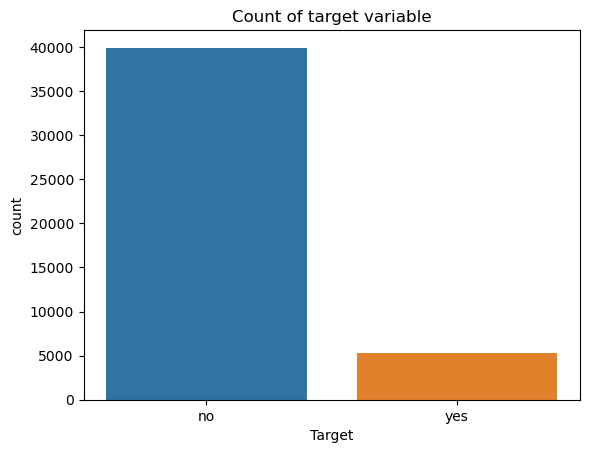

In [8]:
sns.countplot(x = df.y, data = df)
plt.xlabel("Target")
plt.title("Count of target variable")
plt.plot()

**DATA PREPROCESSING**

In [9]:
# Looking into the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [10]:
# getting the shape of dataset
df.shape

(45211, 11)

# **Cleaning The Data**

The following steps are used to clean the data

Check for missing values

Check for duplicates

Check data format(datatype)

Spelling correction

Check for outliers

In [11]:
df.head(15)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no
6,28,management,single,tertiary,unknown,5,may,217,1,unknown,no
7,42,entrepreneur,divorced,tertiary,unknown,5,may,380,1,unknown,no
8,58,retired,married,primary,unknown,5,may,50,1,unknown,no
9,43,technician,single,secondary,unknown,5,may,55,1,unknown,no


# Checking for the missing values

In [12]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

*There are no null values in any column*

# **Checking for duplicates**

In [13]:
df.duplicated().sum()

6

*We got 6 duplicates in the data. We can drop the duplicates as following..*

In [14]:
df = df.drop_duplicates()
df.duplicated().sum()

0

# **Checking whether the data is in right format or not**

In [15]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

# **Checking for the spelling mistakes in object data**

In [16]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [17]:
print(df['job'].unique())
print(df['marital'].unique())
print(df['education_qual'].unique())
print(df['call_type'].unique())
print(df['mon'].unique())
print(df['y'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['no' 'yes']


*There are no spelling mistakes in the data*

# **Outlier Detection**

In [18]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


**Numerical Column Outlier Detection**

<AxesSubplot:xlabel='age'>

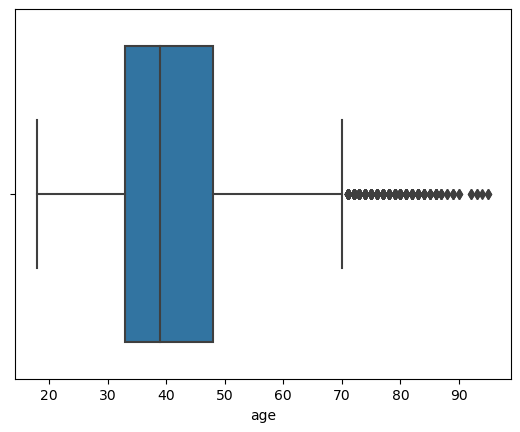

In [19]:
sns.boxplot(df['age'])

**Function to find outliers**

In [20]:
def detect_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5*(IQR)
    upper_fence = Q3 + 1.5*(IQR)
    total_outliers = dataframe.loc[(dataframe[column] < lower_fence) | (dataframe[column] > upper_fence)]
    if len(total_outliers):
      print("LowerFence: {}, UpperFence: {}\n{} Outliers present in {}".format(lower_fence, upper_fence, len(total_outliers), column))

In [21]:
def clip_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5*(IQR)
    upper_fence = Q3 + 1.5*(IQR)
    dataframe[column] = dataframe[column].clip(lower_fence, upper_fence)
     

In [22]:
detect_outliers(df, "age")

LowerFence: 10.5, UpperFence: 70.5
487 Outliers present in age


**Clipping the outliers b/t upper and lower fence values**

In [23]:
clip_outliers(df,'age')

**Boxplot of age after cleaning the outliers**

<AxesSubplot:xlabel='age'>

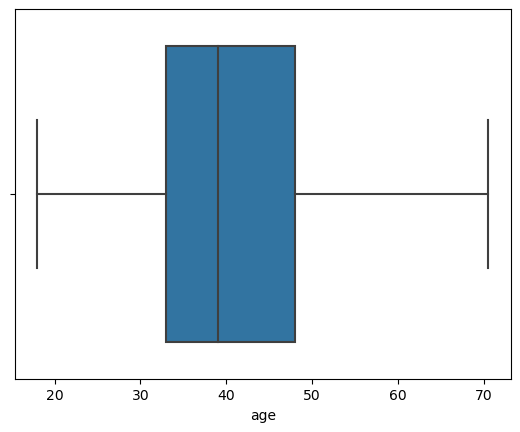

In [24]:
sns.boxplot(df['age'])

**Checking outliers for 'dur'(duration)**

<AxesSubplot:xlabel='dur'>

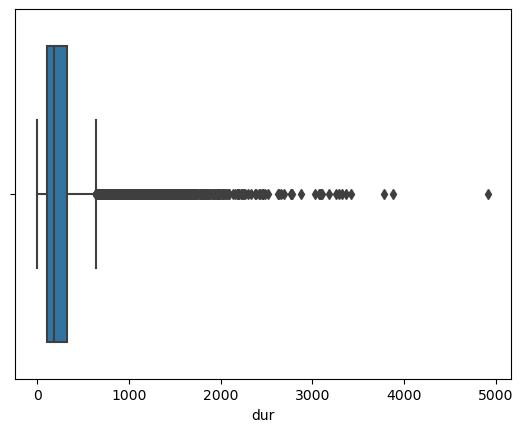

In [25]:
sns.boxplot(df['dur'])

In [26]:
detect_outliers(df,'dur')

LowerFence: -221.0, UpperFence: 643.0
3235 Outliers present in dur


In [27]:
clip_outliers(df,'dur')

**Boxplot of 'dur' after cleaning the outliers**

<AxesSubplot:xlabel='dur'>

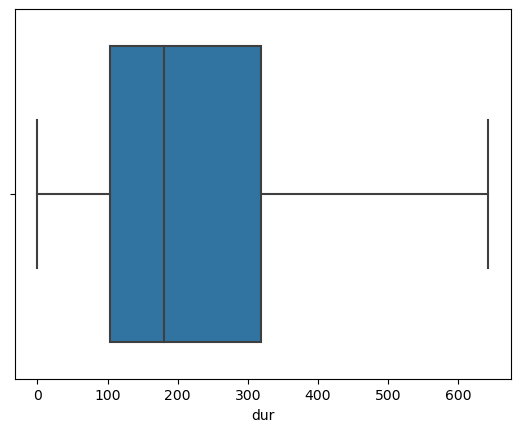

In [28]:
sns.boxplot(df['dur'])

In [29]:
df.dur.describe()

count    45205.00000
mean       234.95620
std        176.75476
min          0.00000
25%        103.00000
50%        180.00000
75%        319.00000
max        643.00000
Name: dur, dtype: float64

**Checking outliers for 'num_calls'**

<AxesSubplot:xlabel='num_calls'>

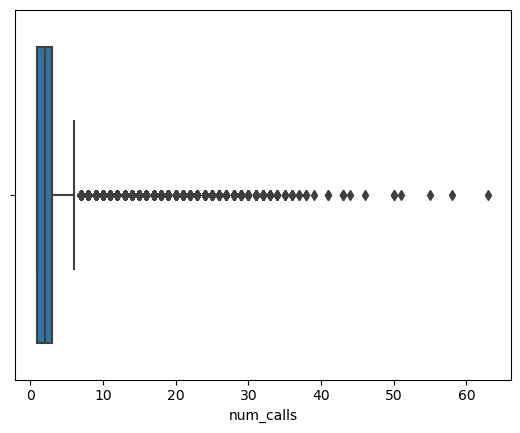

In [30]:
sns.boxplot(df['num_calls'])

In [31]:
detect_outliers(df, 'num_calls')

LowerFence: -2.0, UpperFence: 6.0
3064 Outliers present in num_calls


In [32]:
clip_outliers(df,'num_calls')

**Boxplot of 'num_calls' after cleaning the outliers**

<AxesSubplot:xlabel='num_calls'>

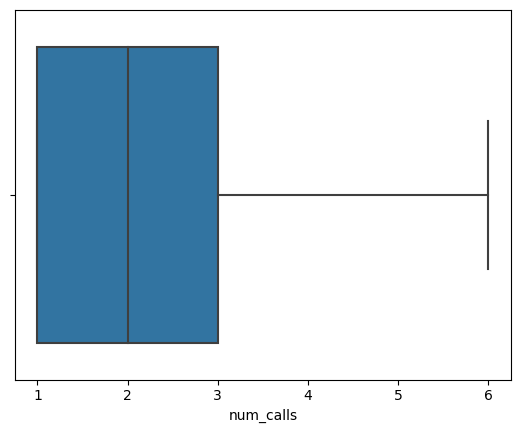

In [33]:
sns.boxplot(df['num_calls'])

In [34]:
df.day.describe()

count    45205.00000
mean        15.80688
std          8.32234
min          1.00000
25%          8.00000
50%         16.00000
75%         21.00000
max         31.00000
Name: day, dtype: float64

# **Cleaning Categorical Columns**

In [35]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [36]:
df['job'].replace(['admin.'],'admin', inplace= True)

In [37]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

**EDA for Categorical Columns** 

Checking Relationship Between Job feature and Y Target 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

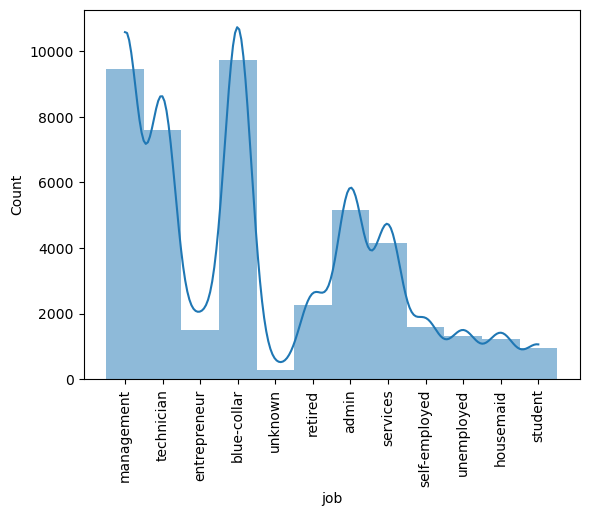

In [38]:
sns.histplot(df.job, linewidth=0,kde=True)
plt.xticks(rotation=90)

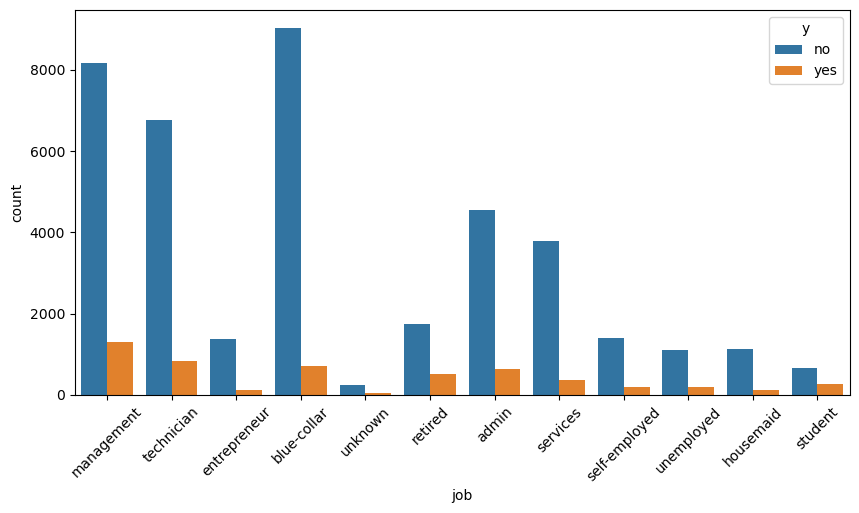

In [39]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='job', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

1. The most targeted customers: Blue-collar job, but comparing with conversion rate, we end up in losing lot of money.(Better to avoid targetting Blue-collar customers a lot)

2. Convertion rate is maximum: Management.

3. But here student has more conversion with average.

**Checking Relationship Between marital feature and y Target**

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

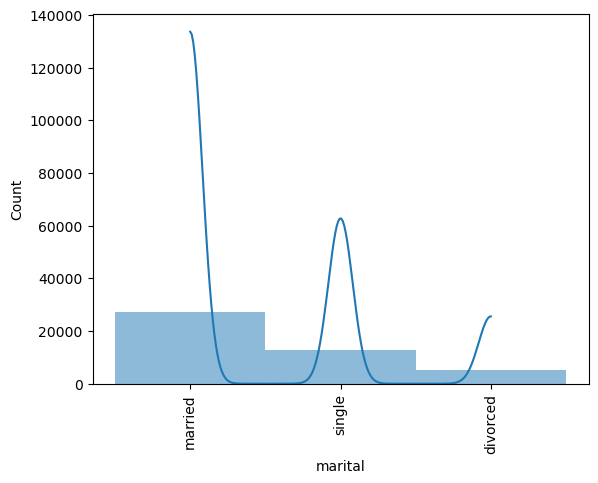

In [40]:
sns.histplot(df.marital, linewidth=0,kde=True)
plt.xticks(rotation=90)

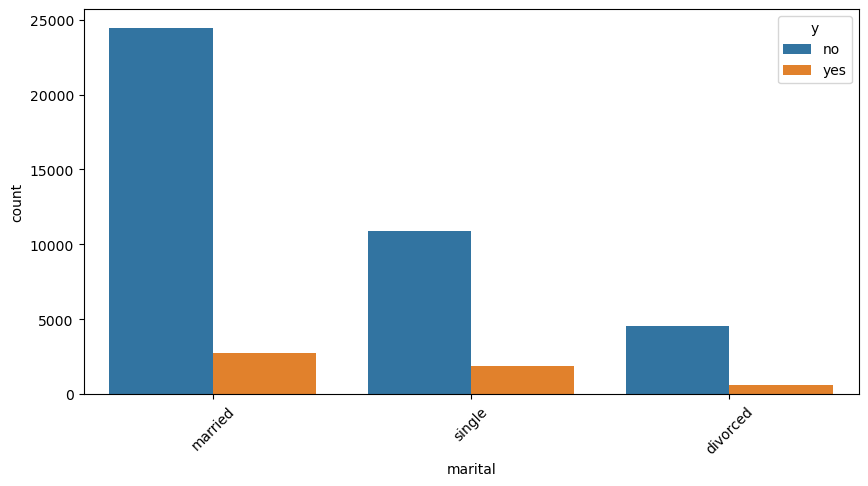

In [41]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='marital', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

1. Married people are more contacted for insurance.
2. But in average single people's conversion rate is more.


**Checking Relationship in between Education_qual and y Target**



([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

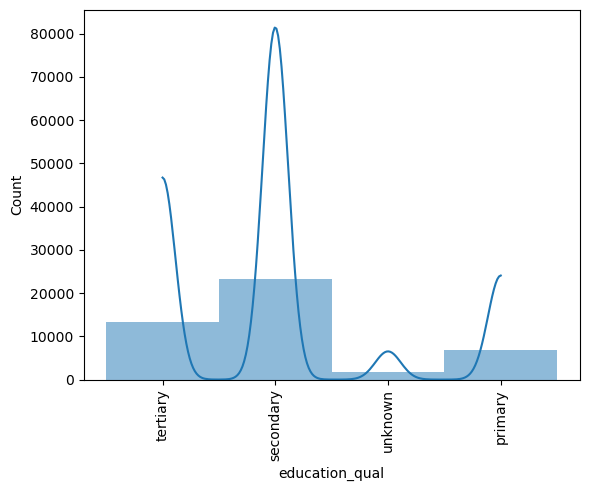

In [42]:
sns.histplot(df.education_qual, linewidth=0,kde=True)
plt.xticks(rotation=90)

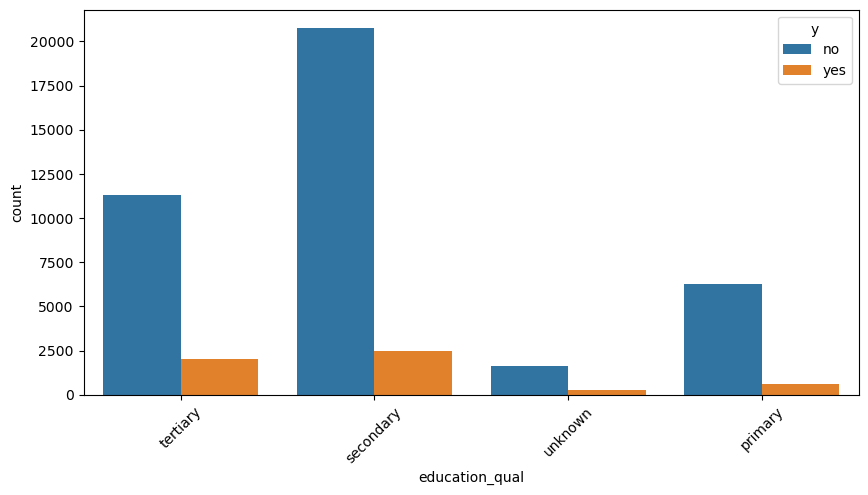

In [43]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='education_qual', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

1. People with higher education(Secondary/Tertiary --> Collage/Masters) are
option for insurance plans.



**Checking Relationship in between the Call_type feature and y target**

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

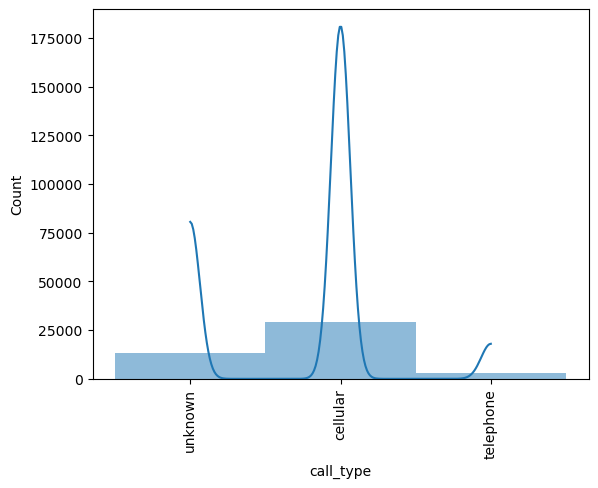

In [44]:
sns.histplot(df.call_type, linewidth=0,kde=True)
plt.xticks(rotation=90)
     

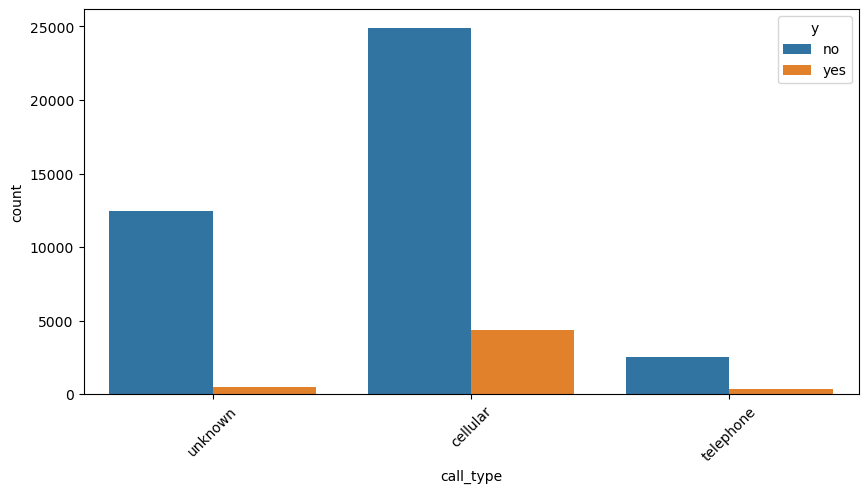

In [45]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='call_type', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

1. Here, cellular type conversation is contributing a lot towards customers opting for insurance plan


**Checking Relationship between the month feature and y target**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

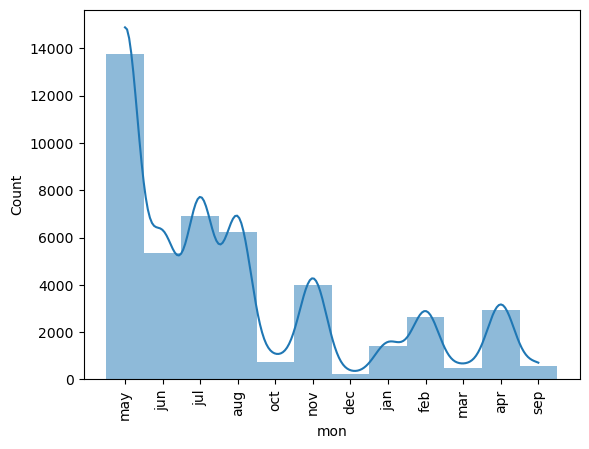

In [46]:
sns.histplot(df.mon, linewidth=0,kde=True)
plt.xticks(rotation=90)

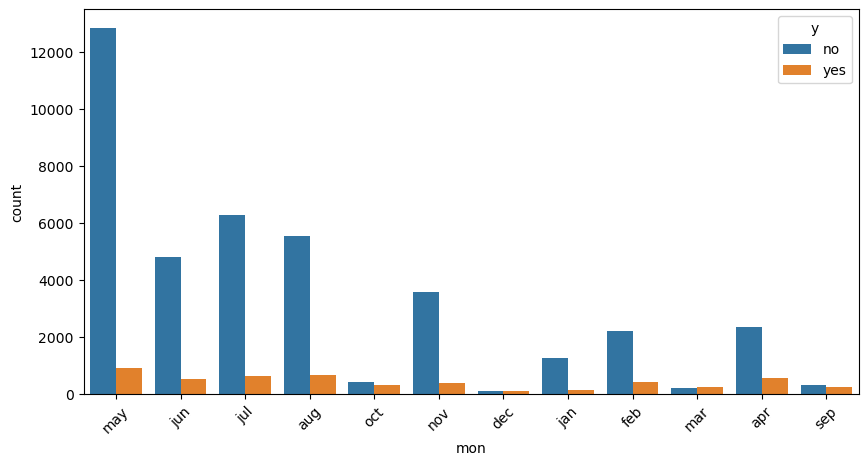

In [47]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='mon', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

1. People opting for Insurance plans when targeted during start of new financial year/When they get their appraisal cycle result.




**Checking the Relationship between prev_outcome feature and y target**

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

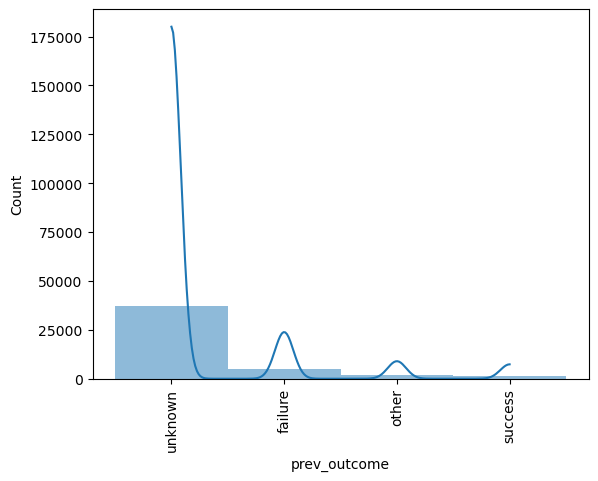

In [48]:
sns.histplot(df.prev_outcome, linewidth=0,kde=True)
plt.xticks(rotation=90)

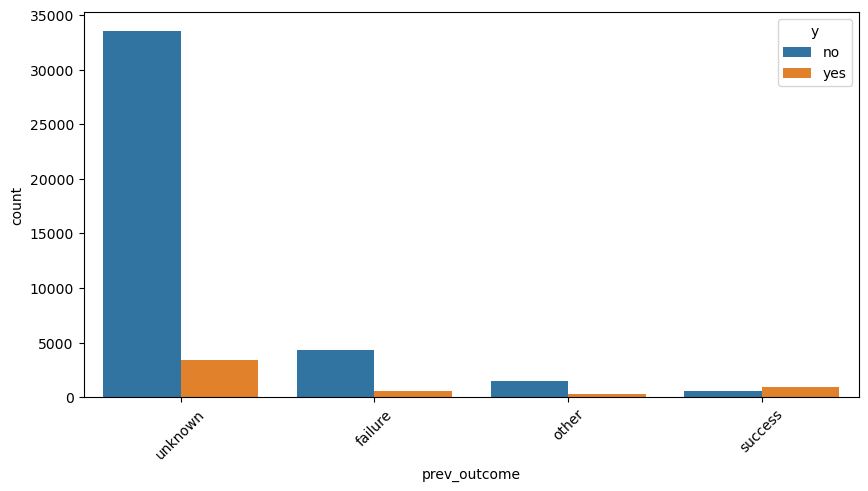

In [49]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='prev_outcome', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

# EDA For Numarical Columns



**Checking Relationship Between age feature and y target **

<AxesSubplot:xlabel='age', ylabel='Density'>

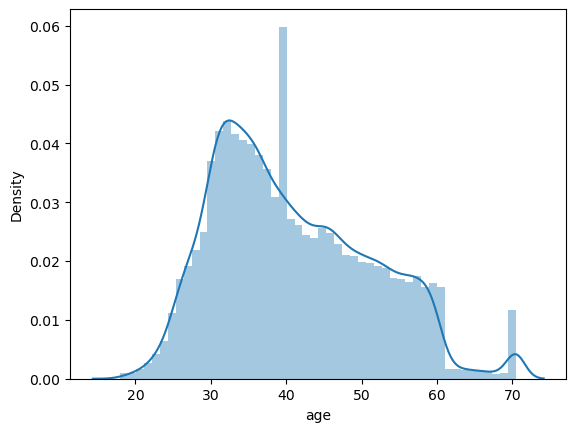

In [50]:
sns.distplot(df['age'])

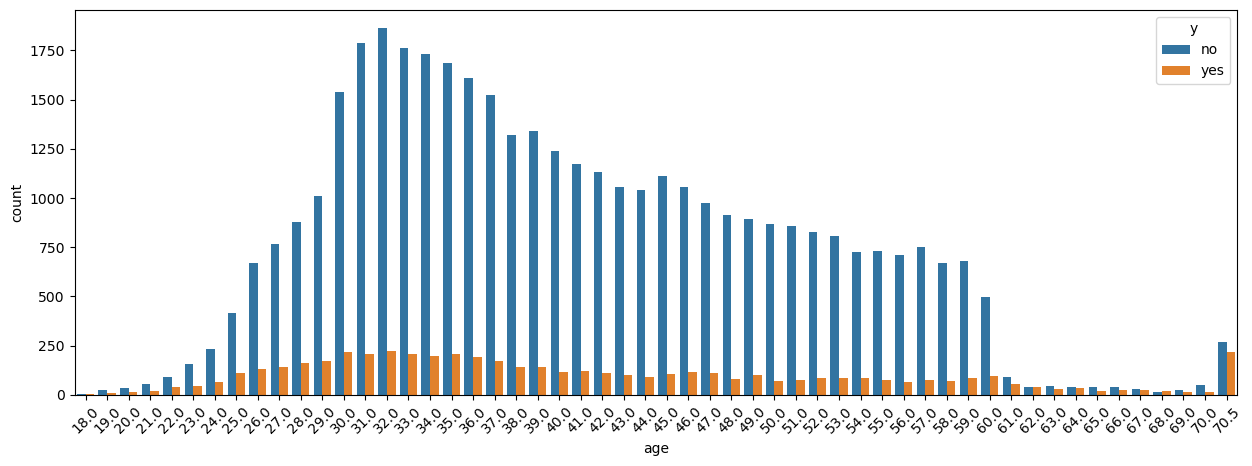

In [51]:
fig, axes=plt.subplots(ncols=1,figsize=(15,5))
sns.countplot(x='age', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()
     

Checking Relationship in between day feature and y target

<AxesSubplot:xlabel='day', ylabel='Density'>

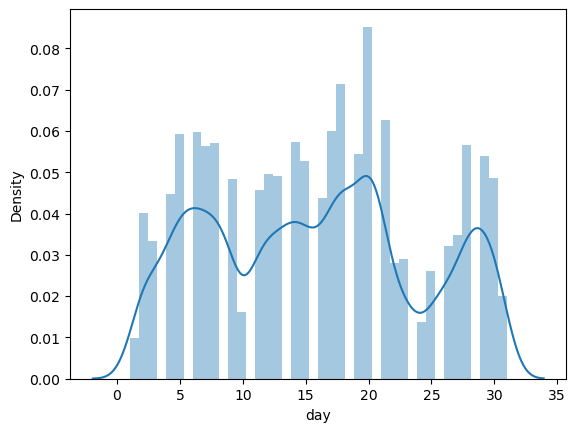

In [52]:
sns.distplot(df['day'])

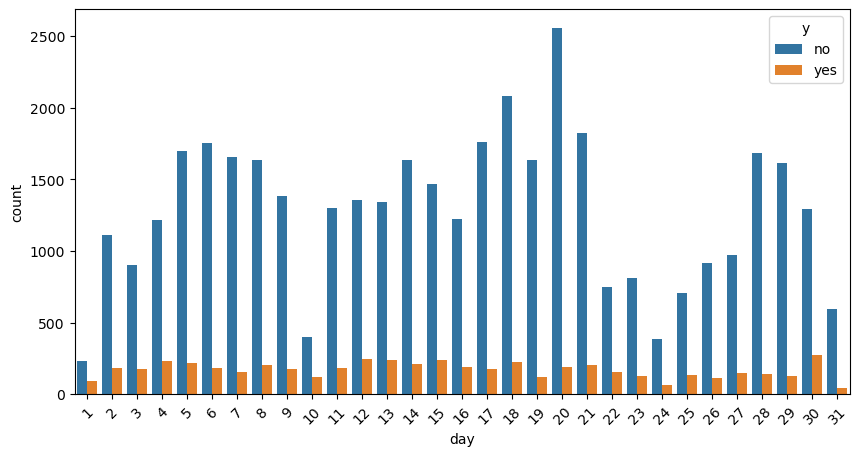

In [53]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='day', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

Checking Relationship between Duration Feature and Y Target

<AxesSubplot:xlabel='dur', ylabel='Density'>

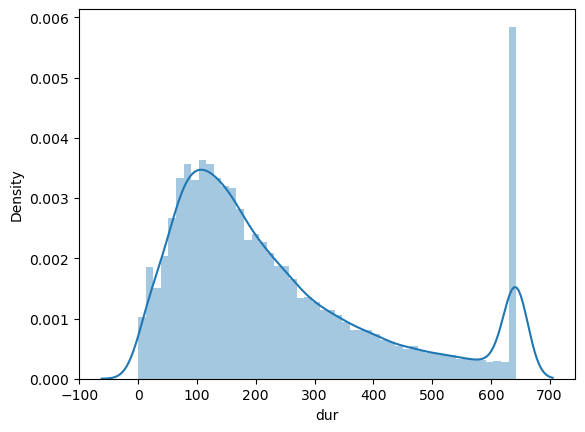

In [54]:
sns.distplot(df['dur'])

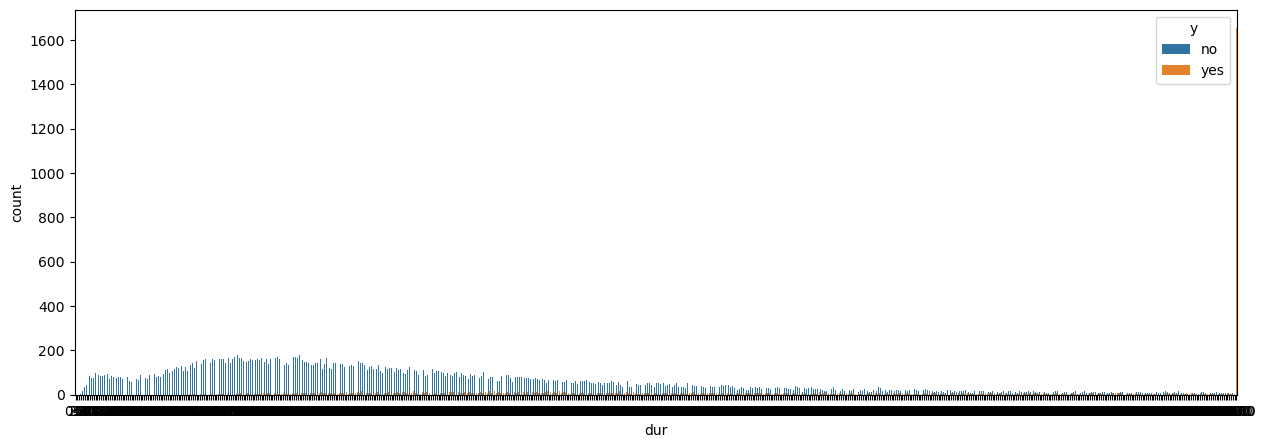

In [55]:
fig, axes=plt.subplots(ncols=1,figsize=(15,5))
sns.countplot(x='dur', hue='y', data=df)
plt.show()

Checking Relationship in between num_calls feature and y target

<AxesSubplot:xlabel='num_calls', ylabel='Density'>

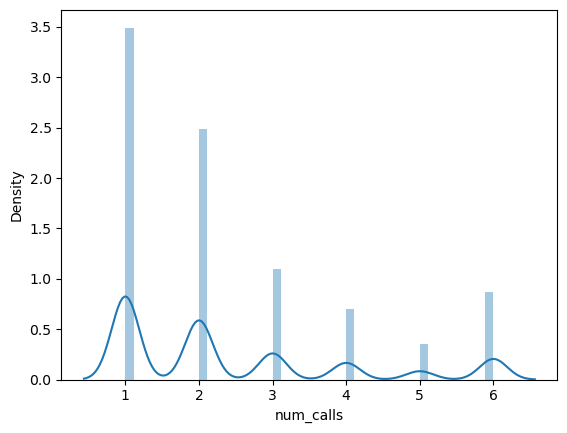

In [56]:
sns.distplot(df['num_calls'])

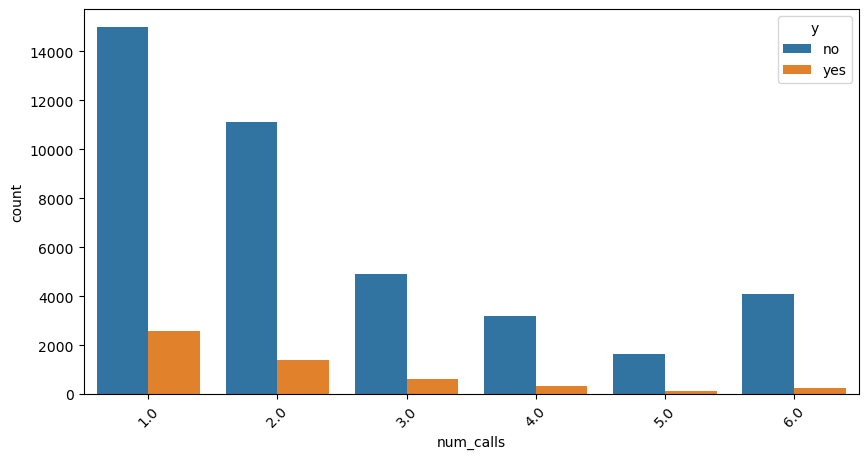

In [57]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='num_calls', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

1. When contacted over phone, mostly customers opting for insurance in maximum 3 attempts.
2. As cost effective approach, avoid reaching customer over phone after 3 attempts.

# **Checking datatypes**

In [58]:
df.dtypes

age               float64
job                object
marital            object
education_qual     object
call_type          object
day                 int64
mon                object
dur               float64
num_calls         float64
prev_outcome       object
y                  object
dtype: object

In [59]:
df['age'] = df['age'].astype(int)
df['dur'] = df['dur'].astype(int)
df['num_calls'] = df['num_calls'].astype(int)
     

# **Encoding the data**

In [60]:
df.dtypes

age                int32
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int32
num_calls          int32
prev_outcome      object
y                 object
dtype: object

# **Label Encoding**

In [61]:
df['job']=df['job'].map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'unknown':5,'self-employed':6,'admin':7,'management':8,'unemployed':9,'retired':10,'student':11})
df['education_qual']=df['education_qual'].map({'primary':0,'secondary':1,'unknown':2,'tertiary':3})
df['call_type']=df['call_type'].map({'unknown':0,'telephone':1,'cellular':2})
df['mon']=df['mon'].map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})

In [62]:
df['y'] = df['y'].map({'yes':1,'no':0})

# **ONE-HOT ENCODING**

In [63]:
df= pd.get_dummies(df, columns=["marital",'prev_outcome'])
df.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,8,3,0,5,0,261,1,0,0,1,0,0,0,0,1
1,44,4,1,0,5,0,151,1,0,0,0,1,0,0,0,1
2,33,1,1,0,5,0,76,1,0,0,1,0,0,0,0,1
3,47,0,2,0,5,0,92,1,0,0,1,0,0,0,0,1
4,33,5,2,0,5,0,198,1,0,0,0,1,0,0,0,1


We done with the Encoding part.Now, move with the target and feature selection

# **TARGET AND FEATURE SELCTION:**

In [64]:
X = df[['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']].values
y = df['y'].values

**SPLITTING**

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)
df['job'] = df['job'].astype(int)

Random Undersampling:

In [66]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler() #Initialis the model 
X_ros, y_ros = ros.fit_resample(X_train, y_train) #Fit the model

In [67]:
lr2 = LogisticRegression()
lr2.fit(X_ros,y_ros)
lr2.score(X_ros,y_ros)

0.8023943661971831

SMOTE:

In [68]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [69]:
lr3 = LogisticRegression()
lr3.fit(X_sm,y_sm)
lr3.score(X_sm,y_sm)

0.8657120500782473

SMOTEENN

In [70]:
import imblearn
smt = SMOTEENN(sampling_strategy='all') 
X_smt, y_smt = smt.fit_resample(X_train, y_train)

In [71]:
import collections, numpy
counter = collections.Counter(y_smt)
counter

Counter({0: 23408, 1: 30313})

**To balance the data:**

1. For Random under sampling , the model score is 81.14%

2. For Random over sampling , the model score is 81.04%
 
3. SMOTE, the model score is 85.56%

Here we got the best score from SMOTE which is 85.56%%.

Now, We gonna use SMOTE technique to build the models.

**1. Logistic Regression:**

In [72]:
lr = LogisticRegression()
lr.fit(X_smt,y_smt)
lr.score(X_smt,y_smt)

0.9151914521323132

In [73]:
lr.predict_proba(X_test)

array([[0.23621482, 0.76378518],
       [0.86524062, 0.13475938],
       [0.2267943 , 0.7732057 ],
       ...,
       [0.93039783, 0.06960217],
       [0.96588743, 0.03411257],
       [0.97164623, 0.02835377]])

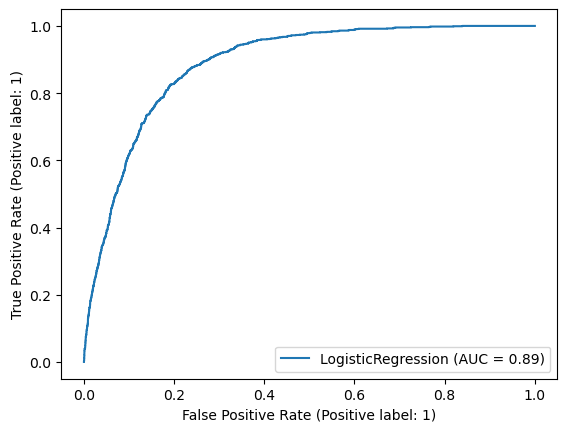

In [74]:
from sklearn.metrics import  plot_roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(lr, X_test, y_test)

**2. DECISION TREE:**

In [75]:
dt = DecisionTreeClassifier() 
dt.fit(X_smt,y_smt) 
print(dt.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(X_test)[:, 1]))

1.0
AUROC on the sampled dataset :  0.7885601597486994


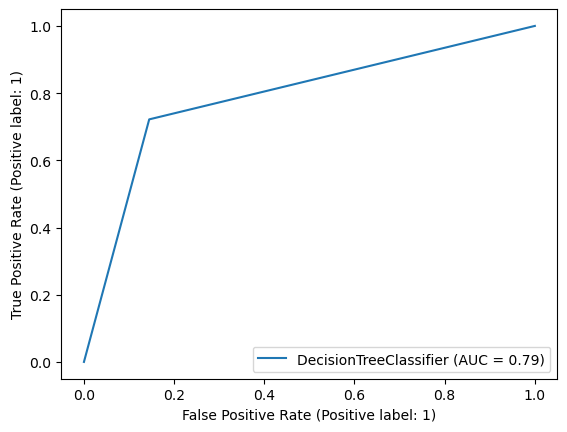

In [76]:

plot_roc_curve(dt, X_test, y_test)
     

In [77]:
for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_smt, y_smt) # the model is trained
  trainAccuracy = accuracy_score(y_smt, dt.predict(X_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_test, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7826734424154428  Cross val score :  0.8810972717938688
Depth  :  2  Training Accuracy :  0.8016976601329089  Cross val score :  0.888176184422823
Depth  :  3  Training Accuracy :  0.8654716032836322  Cross val score :  0.8935962939422089
Depth  :  4  Training Accuracy :  0.9003183112749205  Cross val score :  0.8969145113186329
Depth  :  5  Training Accuracy :  0.9125667802163028  Cross val score :  0.896140663961277
Depth  :  6  Training Accuracy :  0.926862865546062  Cross val score :  0.8973580892778565
Depth  :  7  Training Accuracy :  0.9386459671264497  Cross val score :  0.8947037109470493
Depth  :  8  Training Accuracy :  0.9468550473743973  Cross val score :  0.8930445411431085
Depth  :  9  Training Accuracy :  0.9536680255393608  Cross val score :  0.891384882413338
Depth  :  10  Training Accuracy :  0.9611697473985964  Cross val score :  0.88939373197086
Depth  :  20  Training Accuracy :  0.9997207795834031  Cross val score :  0.867383391

In [78]:
dt = DecisionTreeClassifier(max_depth=4) 
dt.fit(X_smt,y_smt) 
print(dt.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(X_test)[:, 1]))
     

0.9003183112749205
AUROC on the sampled dataset :  0.8641892578341673


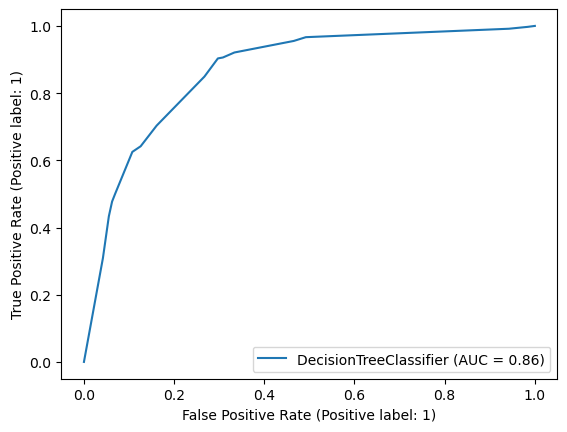

In [79]:
plot_roc_curve(dt, X_test, y_test)

**3. K-NEAREST NEIGHBOUR:**

In [80]:
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(X_smt, y_smt) 
  print("K value :", i, "Cross Value Accuracy :" , np.mean(cross_val_score(knn, X_test, y_test, cv=10)))

K value : 1 Cross Value Accuracy : 0.8513452794211117
K value : 2 Cross Value Accuracy : 0.8799918104923483
K value : 3 Cross Value Accuracy : 0.8740199481738621
K value : 4 Cross Value Accuracy : 0.8808774996333056
K value : 5 Cross Value Accuracy : 0.8788868381166577
K value : 6 Cross Value Accuracy : 0.8807668801642791
K value : 7 Cross Value Accuracy : 0.8806568718525399
K value : 8 Cross Value Accuracy : 0.8818734415489171
K value : 9 Cross Value Accuracy : 0.88297975847064
K value : 10 Cross Value Accuracy : 0.8828686500757836
K value : 20 Cross Value Accuracy : 0.881541216447465
K value : 30 Cross Value Accuracy : 0.8816513469906615
K value : 40 Cross Value Accuracy : 0.8808776218647631
K value : 50 Cross Value Accuracy : 0.8810984941084439


In [81]:
knn= KNeighborsClassifier(i)
knn.fit(X_smt, y_smt)
print(knn.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(X_test)[:, 1]))

0.9123434038830253
AUROC on the sampled dataset :  0.8475100572783166


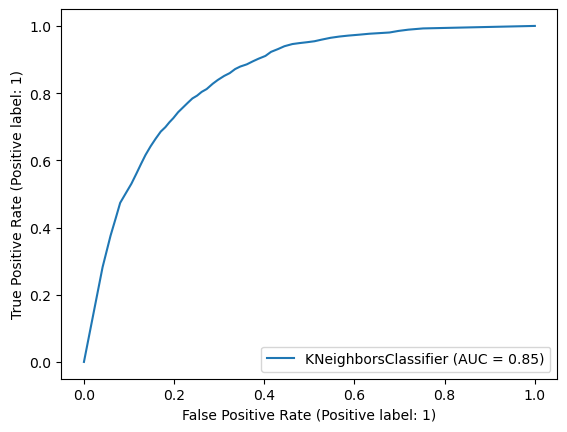

In [82]:
plot_roc_curve(knn, X_test, y_test)

**4. XG_BOOST:**

In [83]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model model.fit(X_smt,y_smt) #train the model 
  print("Learning rate : ", lr," Cross-Val score : ", np.mean(cross_val_score(model, X_test, y_test, cv=10)))

Learning rate :  0.01  Cross-Val score :  0.8995697452696426
Learning rate :  0.02  Cross-Val score :  0.8982423116413241
Learning rate :  0.03  Cross-Val score :  0.8999022148340096
Learning rate :  0.04  Cross-Val score :  0.8993489952574194
Learning rate :  0.05  Cross-Val score :  0.9001228426147755
Learning rate :  0.1  Cross-Val score :  0.8990165256930525
Learning rate :  0.11  Cross-Val score :  0.8979110643915318
Learning rate :  0.12  Cross-Val score :  0.8982421894098666
Learning rate :  0.13  Cross-Val score :  0.8987947978291693
Learning rate :  0.14  Cross-Val score :  0.8991266562362489
Learning rate :  0.15  Cross-Val score :  0.8978003226910479
Learning rate :  0.2  Cross-Val score :  0.8980213171661859
Learning rate :  0.5  Cross-Val score :  0.8922692270082628
Learning rate :  0.7  Cross-Val score :  0.8921582408448637
Learning rate :  1  Cross-Val score :  0.8880665428054565


In [84]:
X_smt

array([[54,  0,  1, ...,  0,  0,  1],
       [53,  2,  1, ...,  0,  0,  1],
       [28,  7,  1, ...,  0,  0,  0],
       ...,
       [36,  4,  1, ...,  0,  0,  1],
       [53,  8,  2, ...,  0,  0,  0],
       [27,  3,  1, ...,  0,  0,  0]], dtype=int64)

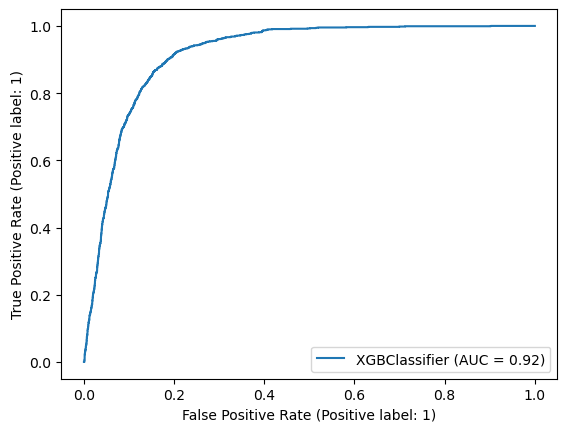

In [85]:
model = xgb.XGBClassifier(learning_rate = 0.14, n_estimators=100, verbosity = 0) # initialise the model 
model.fit(X_smt,y_smt)
plot_roc_curve(model, X_test, y_test)

**5. Random Forest**

In [86]:
classifier = RandomForestClassifier(n_estimators=100,criterion="entropy") 
classifier.fit(X_smt, y_smt) 
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

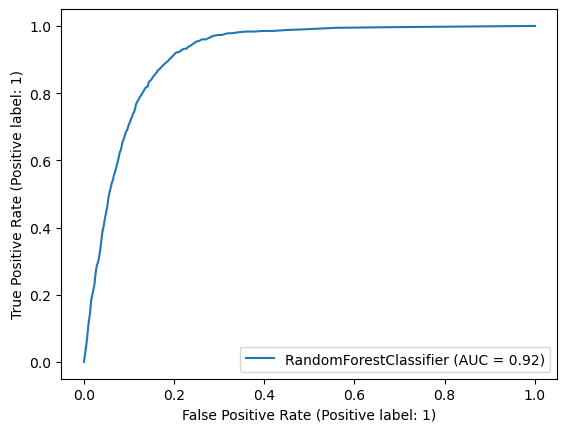

In [87]:
plot_roc_curve(classifier, X_test, y_test)

In [88]:
classifier = RandomForestClassifier(n_estimators=100,criterion="entropy") 
classifier.fit(X_smt, y_smt) 
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [89]:
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, classifier.predict_proba(X_test)[:, 1]))

AUROC on the sampled dataset :  0.9164303522528887


**6. XG BOOST CLASSIFIER**

In [90]:
 for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model model.fit(X_smt,y_smt) #train the model 
  print("Learning rate : ", lr," Cross-Val score : ", np.mean(cross_val_score(model, X_test, y_test, cv=10)))

Learning rate :  0.01  Cross-Val score :  0.8995697452696426
Learning rate :  0.02  Cross-Val score :  0.8982423116413241
Learning rate :  0.03  Cross-Val score :  0.8999022148340096
Learning rate :  0.04  Cross-Val score :  0.8993489952574194
Learning rate :  0.05  Cross-Val score :  0.9001228426147755
Learning rate :  0.1  Cross-Val score :  0.8990165256930525
Learning rate :  0.11  Cross-Val score :  0.8979110643915318
Learning rate :  0.12  Cross-Val score :  0.8982421894098666
Learning rate :  0.13  Cross-Val score :  0.8987947978291693
Learning rate :  0.14  Cross-Val score :  0.8991266562362489
Learning rate :  0.15  Cross-Val score :  0.8978003226910479
Learning rate :  0.2  Cross-Val score :  0.8980213171661859
Learning rate :  0.5  Cross-Val score :  0.8922692270082628
Learning rate :  0.7  Cross-Val score :  0.8921582408448637
Learning rate :  1  Cross-Val score :  0.8880665428054565


AUROC on the sampled dataset :  0.9182755197963436


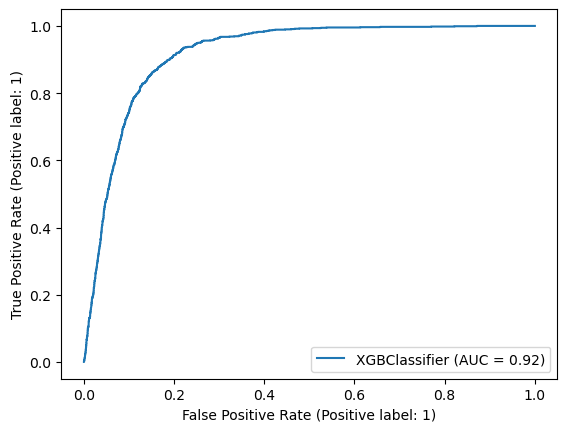

In [91]:
model = xgb.XGBClassifier(learning_rate = 0.2, n_estimators=100, verbosity = 0) # initialise the model 
model.fit(X_smt,y_smt)
plot_roc_curve(model, X_test, y_test)
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, model.predict_proba(X_test)[:, 1]))

**FEATURE IMPORTANCE FROM ALL MODELS:**

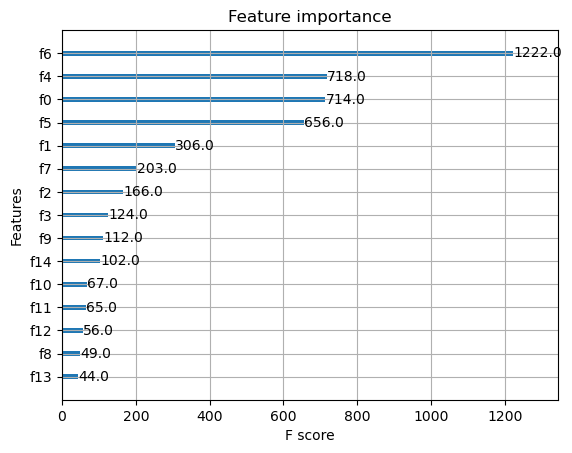

In [92]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()

In [93]:
importance = dt.feature_importances_
list(zip(importance,['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']))

[(0.00328087866562796, 'age'),
 (0.0, 'job'),
 (0.0, 'education_qual'),
 (0.003536738962220304, 'call_type'),
 (0.0, 'day'),
 (0.08242569357356544, 'mon'),
 (0.5439557407612602, 'dur'),
 (0.0, 'num_calls'),
 (0.0, 'marital_divorced'),
 (0.0, 'marital_married'),
 (0.0, 'marital_single'),
 (0.10264793947381039, 'prev_outcome_failure'),
 (0.04339377305632951, 'prev_outcome_other'),
 (0.0, 'prev_outcome_success'),
 (0.22075923550718635, 'prev_outcome_unknown')]

In [94]:
importance = classifier.feature_importances_
list(zip(importance,['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']))

[(0.06352965291095498, 'age'),
 (0.039654524332794004, 'job'),
 (0.018322441829661758, 'education_qual'),
 (0.03986179488928427, 'call_type'),
 (0.06036760458404745, 'day'),
 (0.09309629508488568, 'mon'),
 (0.3926566568213896, 'dur'),
 (0.03688216851154306, 'num_calls'),
 (0.020517854035492562, 'marital_divorced'),
 (0.035189627047725554, 'marital_married'),
 (0.026740891834606092, 'marital_single'),
 (0.04839746028616256, 'prev_outcome_failure'),
 (0.019813880604481703, 'prev_outcome_other'),
 (0.006786606248531844, 'prev_outcome_success'),
 (0.0981825409784387, 'prev_outcome_unknown')]

In [95]:
importance = model.feature_importances_
list(zip(importance,['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']))

[(0.009180747, 'age'),
 (0.012298517, 'job'),
 (0.0095588295, 'education_qual'),
 (0.04167156, 'call_type'),
 (0.010333825, 'day'),
 (0.03453151, 'mon'),
 (0.06796343, 'dur'),
 (0.016011493, 'num_calls'),
 (0.07083536, 'marital_divorced'),
 (0.02283708, 'marital_married'),
 (0.031815715, 'marital_single'),
 (0.21847917, 'prev_outcome_failure'),
 (0.1374834, 'prev_outcome_other'),
 (0.02879848, 'prev_outcome_success'),
 (0.28820089, 'prev_outcome_unknown')]

SOLUTION STATEMENT:
MODELLING:
Models are tested to see which one can better predict consumer conversion.

LOGISTIC REGRESSION, the model AUROC score is 0.9151

DECISION TREE, the model AUROC score is 0.7885

DECISION TREE with max depth, the model AUROC score is 0.8475

KNN, the model AUROC score is 0.8475

RANDOM FOREST, the model AUROC score is 0.9164

XG BOOST CLASSIFIER, the model AUROC score is 0.9182

The model XG BOOST CLASSIFIER has the highest AUROC score, coming in at 0.9182 followed by Random forest and Logistic Regression..